# **Table of Contents**
* [Data Wrangling](#section_21)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = pd.read_csv ( "datasets/Iris.csv" ,    header=None   ,   names=['f1','f2','f3','f4','class'] )

df.sample(5)

,f1,f2,f3,f4,class
148,6.2,3.4,5.4,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa


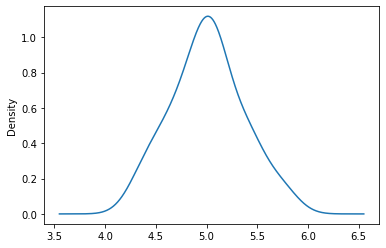

In [3]:
df [ df['class'] == 'Iris-setosa' ]  ['f1']  .plot (kind = 'kde')   ;

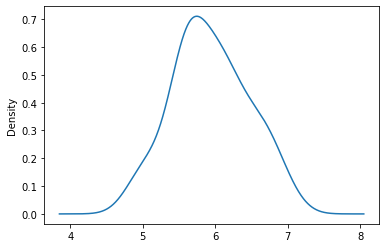

In [4]:
df [ df['class'] == 'Iris-versicolor' ]  ['f1']  .plot (kind = 'kde')  ;

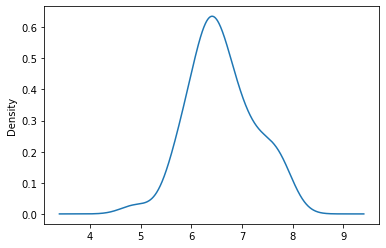

In [5]:
df [ df['class'] == 'Iris-virginica' ]  ['f1']  .plot (kind = 'kde')  ;

> Comments
    
        * According to 'f1'  ............  Setosa < Versicolor < Virginica

<a id='section_21'></a>
# **1 - Data Wrangling**

## **1.1 - Feature Selection via SelectKBest**

In [6]:
X  =  df.drop('class',axis=1)                                    
Y  =  df ['class']

In [7]:
from   sklearn.feature_selection   import   SelectKBest , f_classif

skb = SelectKBest ( f_classif , k=4 )                                             #  k = number of features

skb.fit_transform (X,Y)

skb.pvalues_

array([1.66966919e-31, 1.32791652e-16, 3.05197580e-91, 4.37695696e-85])

#### **Inference**
* p-values of all features are less than 0.05 , hence all are significant predictors of Y
* Lower the p-value , higher the significance , more the separation of clusters in graphs

## **1.2 - Drop**

* Dropping target column for clustering perspective.

In [8]:
df.drop ( 'class' , axis=1 , inplace =True )                             

## **1.3 - Transform**

In [9]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [10]:
df = pd.DataFrame ( pt.fit_transform(df)  ,  columns = df.columns )

df.head(3)

,f1,f2,f3,f4
0,-0.895690,1.035191,-1.333312,-1.32913
1,-1.185173,-0.073638,-1.333312,-1.32913
2,-1.487921,0.385497,-1.387002,-1.32913


<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

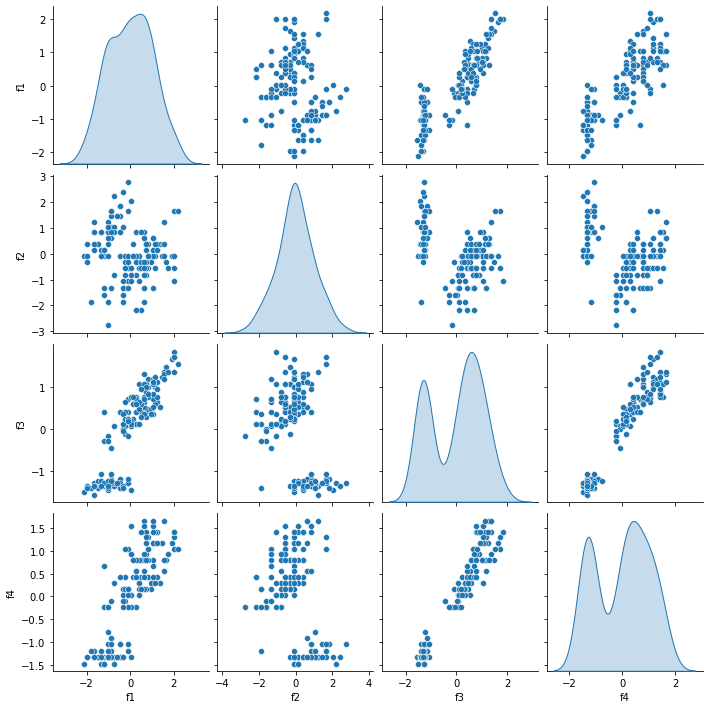

In [11]:
sns.pairplot ( df , diag_kind ='kde' ) ;

#### **Inference**
* Range of K = 2 to 6

### **2.1.2 - Elbow Plot**

In [12]:
from sklearn.cluster import KMeans

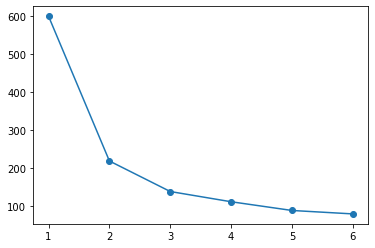

In [13]:
err    = []                    

for k in range(1,7):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,7)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [14]:
from   sklearn.metrics   import  silhouette_score

In [15]:
scores =[]

for k in range(2,9):                                                               

    KM     =  KMeans (n_clusters =k , random_state =2)
    
    labels =  KM.fit_predict (df)

    avg    =  silhouette_score ( df , labels)
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [16]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0)    .head()     .style.hide_index()

k,Avg Silhouette Score
2,0.585713
3,0.456429
4,0.425813
5,0.353723
6,0.338338


### **2.1.4 - Dendrogram**

In [17]:
from sklearn.cluster          import  AgglomerativeClustering 
from scipy.cluster.hierarchy  import  dendrogram, linkage

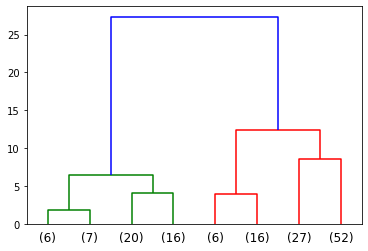

In [18]:
model  =  AgglomerativeClustering  (affinity ='euclidean' ,  linkage ='ward')

model.fit (df)

Z = linkage (df, 'ward')

dendrogram ( Z  ,  p=2  ,  truncate_mode='level')                                         

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 2 |         
| Silhouette | 2 |
| Dendrogram | 3 |

In [19]:
KM    =  KMeans ( n_clusters=3 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [20]:
labels         =  KM.predict(df)                                     

df ["cluster"] =  labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

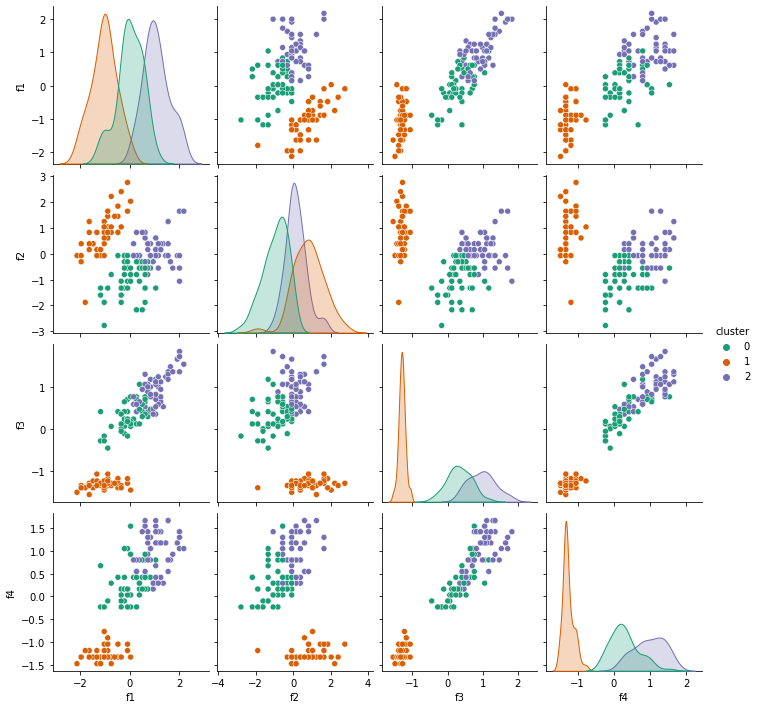

In [21]:
sns.pairplot ( df , diag_kind ='kde' , hue='cluster' , palette='Dark2') ;

### **2.4.2 - Boxplot**

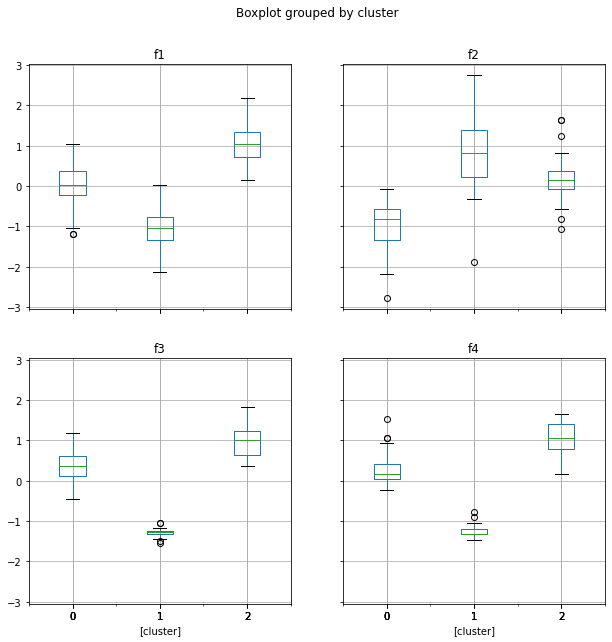

In [22]:
df.boxplot (by='cluster', figsize=(10,10))

plt.show()

### **2.4.3 Scatterplot**

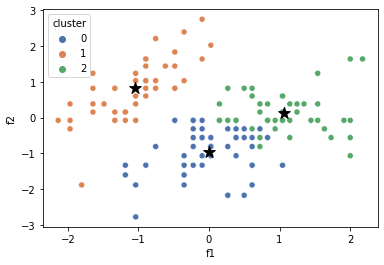

In [23]:
sns.scatterplot ( x='f1' ,  y='f2'  ,  hue = 'cluster' , data=df  , palette='deep')  

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='black' , marker='*' )

plt.show()

<a id='section_7'></a>
# **3 - Inference from Clusters**

| Label | Signifies |
| ---    | ---    |
| 0  | Versicolor|         
| 1 | Setosa |
| 2 | Virginica |